<a href="https://colab.research.google.com/github/jumokewale/Authentication-in-php/blob/master/CO2_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_excel("datasets/emission_annual.xls")

In [ ]:
df.head()

,Year,State,Producer Type,Energy Source,CO2\n(Metric Tons),SO2\n(Metric Tons),NOx\n(Metric Tons)
0,1990,AK,Commercial Cogen,All Sources,824004,13198,3011
1,1990,AK,Commercial Cogen,Coal,821929,13191,3009
2,1990,AK,Commercial Cogen,Petroleum,2075,6,2
3,1990,AK,Commercial Non-Cogen,All Sources,0,149,42
4,1990,AK,Commercial Non-Cogen,Petroleum,0,149,42


In [ ]:
df.shape

(43258, 7)

In [ ]:
df.columns

Index(['Year', 'State', 'Producer Type', 'Energy Source', 'CO2\n(Metric Tons)',
       'SO2\n(Metric Tons)', 'NOx\n(Metric Tons)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43258 entries, 0 to 43257
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               43258 non-null  int64 
 1   State              43258 non-null  object
 2   Producer Type      43258 non-null  object
 3   Energy Source      43258 non-null  object
 4   CO2
(Metric Tons)  43258 non-null  int64 
 5   SO2
(Metric Tons)  43258 non-null  int64 
 6   NOx
(Metric Tons)  43258 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,Year,CO2\n(Metric Tons),SO2\n(Metric Tons),NOx\n(Metric Tons)
count,43258.000000,4.325800e+04,4.325800e+04,4.325800e+04
mean,2005.216446,1.229009e+07,4.953446e+04,2.444354e+04
std,8.411532,9.703652e+07,4.839906e+05,2.285423e+05
min,1990.000000,-1.200000e+01,0.000000e+00,0.000000e+00
25%,1998.000000,2.580000e+02,1.000000e+00,8.200000e+01
50%,2005.000000,1.282880e+05,4.200000e+01,6.320000e+02
75%,2013.000000,1.825211e+06,3.292000e+03,4.074750e+03
max,2019.000000,2.547032e+09,1.546152e+07,7.996658e+06


In [ ]:
df.corr()

,Year,CO2\n(Metric Tons),SO2\n(Metric Tons),NOx\n(Metric Tons)
Year,1.000000,-0.012791,-0.063881,-0.064727
CO2\n(Metric Tons),-0.012791,1.000000,0.882144,0.876682
SO2\n(Metric Tons),-0.063881,0.882144,1.000000,0.985101
NOx\n(Metric Tons),-0.064727,0.876682,0.985101,1.000000


In [ ]:
df.isna().sum()

Year                  0
State                 0
Producer Type         0
Energy Source         0
CO2\n(Metric Tons)    0
SO2\n(Metric Tons)    0
NOx\n(Metric Tons)    0
dtype: int64

In [ ]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

State
Producer Type
Energy Source


In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use("seaborn-white")

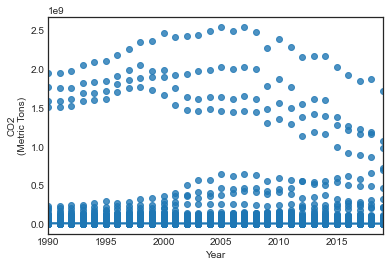

In [ ]:
sns.regplot(x=df['Year'], y =df["CO2\n(Metric Tons)"], data= df.columns);

### Data pre-processing

Change Categorical columns to numerical using OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('CO2\n(Metric Tons)', axis=1)
y = df['CO2\n(Metric Tons)']

In [ ]:
X.head()

,Year,State,Producer Type,Energy Source,SO2\n(Metric Tons),NOx\n(Metric Tons)
0,1990,AK,Commercial Cogen,All Sources,13198,3011
1,1990,AK,Commercial Cogen,Coal,13191,3009
2,1990,AK,Commercial Cogen,Petroleum,6,2
3,1990,AK,Commercial Non-Cogen,All Sources,149,42
4,1990,AK,Commercial Non-Cogen,Petroleum,149,42


In [ ]:
y.head()

0    824004
1    821929
2      2075
3         0
4         0
Name: CO2\n(Metric Tons), dtype: int64

In [ ]:
Categorical_features = ['State', 'Producer Type', 'Energy Source']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot",
                                 one_hot,
                                 Categorical_features)],
                               remainder = "passthrough")

transformed_x = transformer.fit_transform(X)
transformed_x

<43258x73 sparse matrix of type '<class 'numpy.float64'>'
	with 247888 stored elements in Compressed Sparse Row format>

In [ ]:
#Split the dataset into train and test data
X_train,X_test,y_train,y_test = train_test_split(transformed_x,y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((30280, 73), (12978, 73), (30280,), (12978,))

### Modeling 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [ ]:
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
LR_model.score(X_test,y_test)

0.7805936324845153

In [ ]:
y_pred = LR_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score 
mae = mean_squared_error(y_test,y_pred)
print(mae)

2436850437429794.0


In [ ]:
y_pred

array([ 1.81999005e+07, -1.08591408e+07,  2.69615574e+09, ...,
        4.77238293e+06,  5.11794433e+07,  3.74078529e+07])

In [ ]:
R2 = r2_score(y_test,y_pred)
print(R2)

0.7805936324845153


In [ ]:
RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_preds = RFR.predict(X_test)
y_preds

array([3.16836423e+06, 1.34241700e+04, 1.98742664e+09, ...,
       9.56322150e+05, 8.83693626e+07, 1.05336646e+08])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mae = mean_squared_error(y_test,y_preds)

In [ ]:
print(round(mae, 3))

138252715114460.62


In [ ]:
R2 = r2_score(y_test,y_preds)
print(round(R2, 3))

0.988


In [ ]:
ridge_model = Ridge(alpha=0.4)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.4)

In [ ]:
y_predss = ridge_model.predict(X_test)
y_predss

array([9.11402528e+06, 3.29214776e+06, 2.75882350e+09, ...,
       3.72168273e+06, 4.39757492e+07, 1.94598899e+07])

In [ ]:
mae = mean_squared_error(y_test,y_predss)
mae

2609094134190977.5

In [ ]:
R2 = r2_score(y_test,y_predss)

In [ ]:
print(round(R2, 3))

0.765
